# Model prediction using LogisticRegression with upsampling and using liblinear with predict proba

In [1]:
# Import all necessary packages
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score
from joblib import load
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# import the model
reg = load('../models/LogisticRegression_upsampling_liblinear_predict_proba_1.joblib')

In [3]:
# import  dataset to use by first notebook
from src.features.helper_functions import load_sets

X_train, y_train, X_val, y_val, X_test = load_sets()

In [4]:
# predictions probability
y_train_preds = reg.predict_proba(X_train)[:,1]
y_val_preds = reg.predict_proba(X_val)[:,1]

In [5]:
# AUROC scores
print('Train AUROC score:',roc_auc_score(y_train,y_train_preds))
print('Validation AUROC score:', roc_auc_score(y_val,y_val_preds))

Train AUROC score: 0.7067264357198266
Validation AUROC score: 0.704850434266602


In [6]:
# Do a confusion matrix on the train sets
confusion_matrix(y_train, y_train_preds.round())

array([[3557, 1780],
       [1942, 3391]])

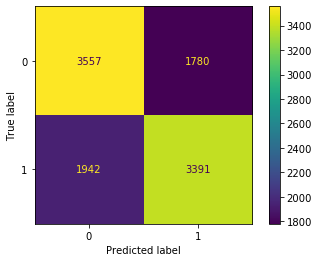

In [7]:
# plot the confusion matrix by counts
plot_confusion_matrix(reg, X_train, y_train)
plt.show()

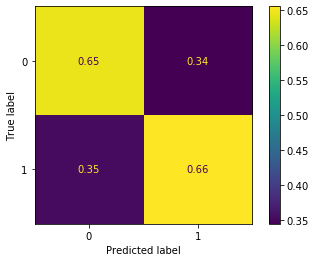

In [8]:
# plot the same confusion matrix based on % of prediction
plot_confusion_matrix(reg, X_train, y_train, normalize="pred")
plt.show()

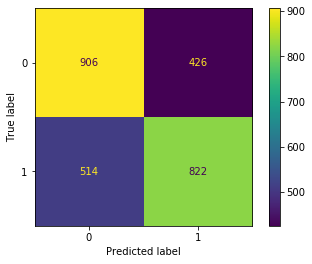

In [9]:
# plot the confusion matrix by counts
plot_confusion_matrix(reg, X_val, y_val)
plt.show()

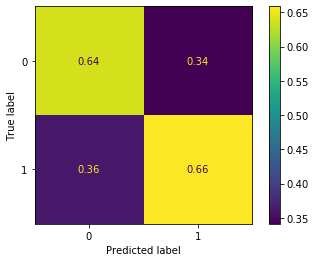

In [10]:
# Now do a confusion matrix on the validation sets
plot_confusion_matrix(reg, X_val, y_val, normalize="pred")
plt.show()

In [11]:
# Do a classification report on the train sets
print(classification_report(y_train, y_train_preds.round()))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      5337
           1       0.66      0.64      0.65      5333

    accuracy                           0.65     10670
   macro avg       0.65      0.65      0.65     10670
weighted avg       0.65      0.65      0.65     10670



In [12]:
# Do a classification report on the validation sets
print(classification_report(y_val, y_val_preds.round()))

              precision    recall  f1-score   support

           0       0.64      0.68      0.66      1332
           1       0.66      0.62      0.64      1336

    accuracy                           0.65      2668
   macro avg       0.65      0.65      0.65      2668
weighted avg       0.65      0.65      0.65      2668



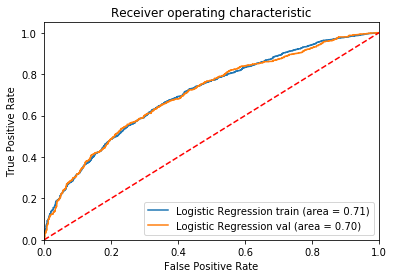

In [13]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_val, tpr_val, thresholds_test = roc_curve(y_val, y_val_preds)
fpr_train, tpr_train, thresholds_train = roc_curve(y_train,y_train_preds)
plt.figure()
plt.plot(fpr_train, tpr_train, label='Logistic Regression train (area = %0.2f)' % roc_auc_score(y_train,y_train_preds))
plt.plot(fpr_val, tpr_val, label='Logistic Regression val (area = %0.2f)' % roc_auc_score(y_val,y_val_preds))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [14]:
# Use the model to predict on the test sets and prepare submission
y_test_preds = reg.predict_proba(X_test)[:,1]
y_test_preds_label = reg.predict(X_test)

In [16]:
from collections import Counter
unique_elements, counts_elements = np.unique(y_test_preds_label, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[[   0    1]
 [1595 2204]]


In [38]:
# Export the prediction for submission
submission = pd.DataFrame({'Id':test['Id'],'TARGET_5Yrs':y_test_preds})
submission.to_csv('submission_week_2_9.csv',index=False)